## Undocumented Immigrants’ US Tax Contributions

In [247]:
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True,theme='white')
from plotly import tools

import numpy as np

There is a common misconception that undocumented immigrants cost US taxpayers billions, that they take jobs away from working-class Americans and cause an increase in the labor supply, resulting in lower wages. This, however, is completely false. In fact, undocumented immigrants contribute billions of dollars in federal taxes every year. It is important to note that it is impossible to get exact numbers due to limited available data - so keep in mind that the following numbers are the best estimates we have at hand.

The Institute on Taxation & Economic Policy pulled data from the US Census Bureau and the Migration Policy Institute to estimate the number of undocumented immigrants in every state, their average incomes and homeownership rates. Using this data, they calculated how much taxes they pay based on the various state tax rates, concluding in their [2017 report](https://itep.org/wp-content/uploads/immigration2017.pdf) that undocumented workers paid a total of $11.7 billion in state and local taxes in 2014, the most recent year of data.


But which taxes exactly are undocumented immigrants paying?

1. Federal taxes using fake Social Security numbers on their W-2 forms.

2. Income tax returns with an Individual Taxpayer Identification Number (ITIN).

3. Payroll taxes for Medicare and Social Security, which are withheld from those receiving paychecks.


Their paid taxes were estimated at:

- $7 billion in sales and excise taxes.

- $1.1 billion in state income taxes.

- $3.6 billion in property taxes.


So, undocumented immigrants pay billions of dollars in taxes - let's map this out!

In [248]:
df = pd.read_csv('immigrant-taxes.csv').set_index('Code')
df['Current State and Local Taxes'] = df['Current State and Local Taxes'].apply(lambda x: x.replace('$',''))
df['State and Local Taxes if Granted Full Legal Status'] = df['State and Local Taxes if Granted Full Legal Status'].apply(lambda x: x.replace('$',''))
df['Tax Change'] = df['Tax Change'].apply(lambda x: x.replace('$',''))
df['Tax Change'] = df['Tax Change'].apply(lambda x: x.replace('+',''))

df['Current State and Local Taxes'] = df['Current State and Local Taxes'].str.replace(",", "").astype(int)
df['Tax Change'] = df['Tax Change'].str.replace(",", "").astype(float)
df['State and Local Taxes if Granted Full Legal Status'] = df['State and Local Taxes if Granted Full Legal Status'].str.replace(",", "").astype(int)

### Existing Taxes Paid by Undocumented Immigrants

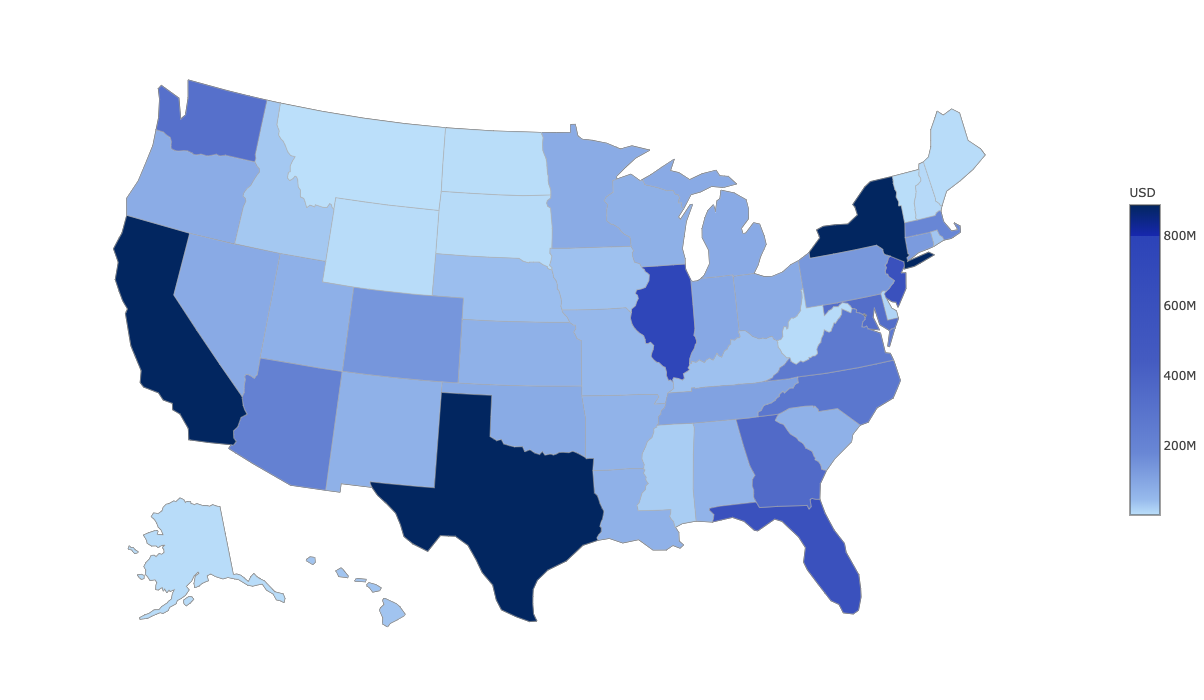

In [249]:
bar_max = 800000000
factor = 0.9  # Normalized location where continuous colorscale should end

plotmap = [ dict(
        type = 'choropleth',
        locations = df.index,
        locationmode = 'USA-states',
        z = df['Current State and Local Taxes'],
        text = df['State'],
        zmin=500000,
        zmax= bar_max/factor,
        colorscale = [[0, '#BBDFFA'],
                      [0.05, '#97BAEC'],
                      [0.2, '#6987D5'],
                      [0.5, '#445BC1'],
                      [factor, '#2C43B8'],
                      [factor, '#1727AE'],
                      [1, '#022660']
                     ],
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar =go.choropleth.ColorBar(
            title = 'USD',
            len=0.5
        ),
      ) ]

layout = dict(
    margin={"t": 0, "b": 0, "l": 0, "r": 0},
    geo = dict(
        showframe = False,
        showcoastlines = False,
        scope = 'usa',
        projection = dict(
            type = 'albers usa'
        )
    ),
     height=700,
    width=900
    
)

fig = dict( data=plotmap, layout=layout )
iplot(fig)

Undocumented workers contribute the most tax dollars to the most populous states - California, Texas, and New York:

- California -  $3.2 billion

- Texas - $1.6 billion

- New York - $1.1 billion 


An interesting point of note is the tax contributions of undocumented workers in states Trump won in the 2016 presidential election:

- Florida - $598.7 million 

- Georgia - $351.7 million

- North Carolina - $277.4 million

- Texas - $1.6 billion

### State and Local Taxes if Granted Full Legal Status

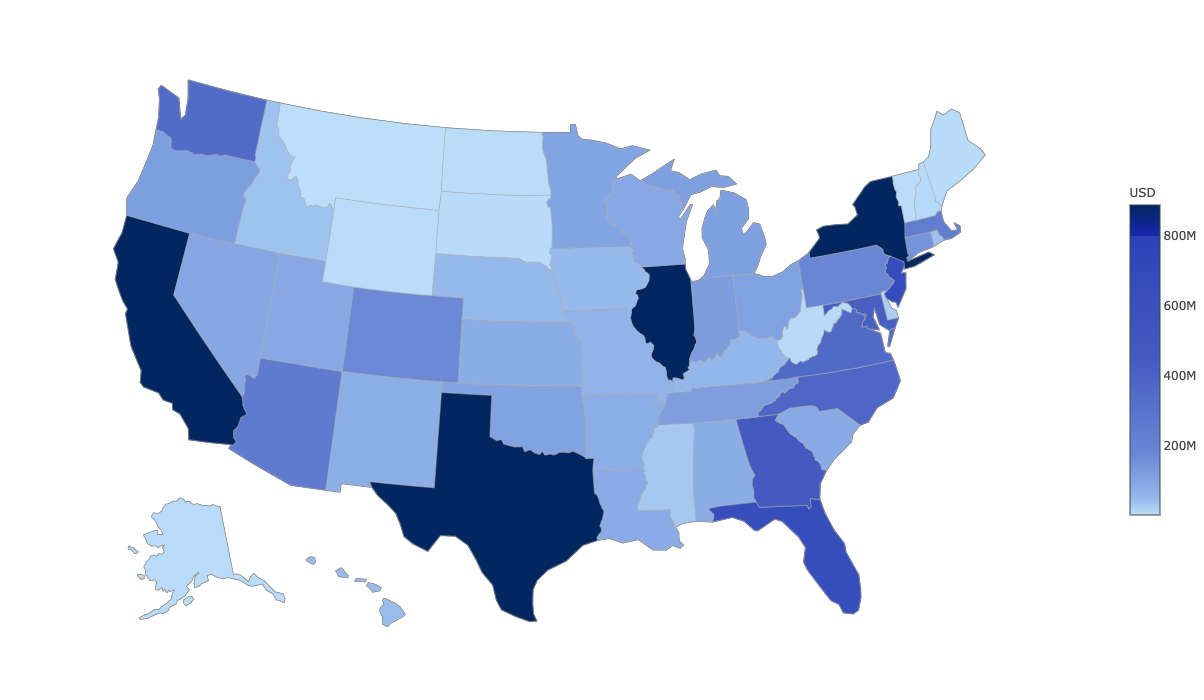

In [250]:
plotmap = [ dict(
        type = 'choropleth',
        locations = df.index,
        locationmode = 'USA-states',
        z = df['State and Local Taxes if Granted Full Legal Status'],
        text = df.index,
        zmin=500000,
        zmax= bar_max/factor,
        colorscale = [[0, '#BBDFFA'],
                      [0.05, '#97BAEC'],
                      [0.2, '#6987D5'],
                      [0.5, '#445BC1'],
                      [factor, '#2C43B8'],
                      [factor, '#1727AE'],
                      [1, '#022660']
                     ],
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar =go.choropleth.ColorBar(
            title = 'USD',
            len=0.5
        ),
      ) ]

layout = dict(
    margin={"t": 0, "b": 0, "l": 0, "r": 0},
    geo = dict(
        showframe = False,
        showcoastlines = False,
        scope = 'usa',
        projection = dict(
            type = 'albers usa'
        )
    ),
     height=700,
    width=900
)

fig = dict( data=plotmap, layout=layout )
iplot(fig)

As mentioned earlier, undocumented immigrants collectively contribute approximately $$11.74 billion each year. The 2017 analysis concludes, however, that granting legal status to all undocumented immigrants in the United States as part of a comprehensive immigration reform and allowing them to work legally would increase their state and local tax contributions by
an estimated $2.18 billion a year.

This can be broken down as follows:

- Personal income tax collections would increase by $1.1 billion a year.

- Sales and excise taxes would increase by $702 million.

- Property taxes would grow by $362 million.

### Change in Tax Revenue

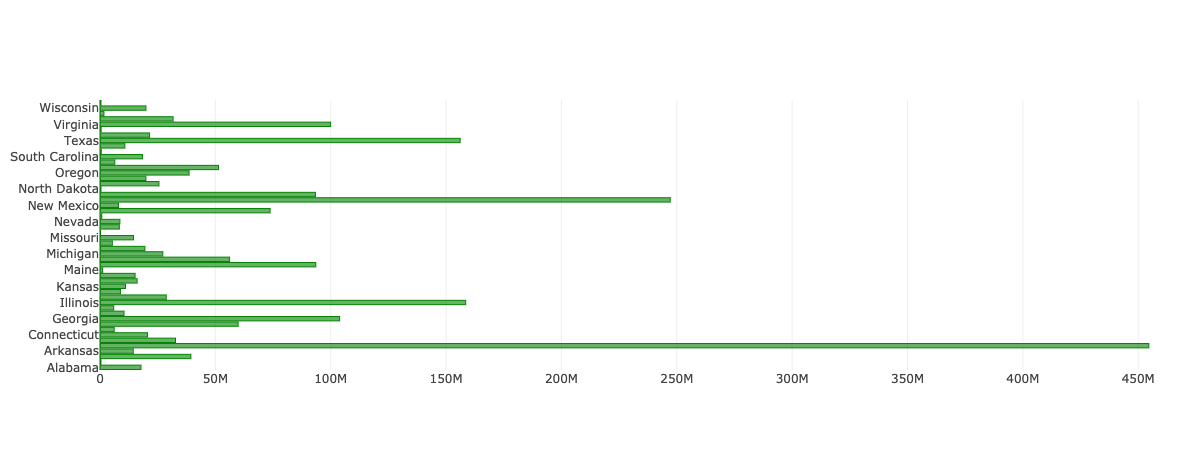

In [239]:
layout = cf.Layout(
    height=900,
    margin= {'l': 100, 'r': 0})
df.set_index('State')['Tax Change'].iplot(kind='bar', orientation='h', color='green', layout=layout)

- Caifornia, naturally, stands to gain the most from such immigration reform.

- New York and Texas would also experience significant increases in tax revenue to the tune of 100s of millions of dollars.

- Other states whose net gain from immigration reform would breach the $100 million boundary are Virginia, Georgia and Illinois.

- Overall, the net benefit to state and local tax contributions would sum to about $2.18 billion per year.

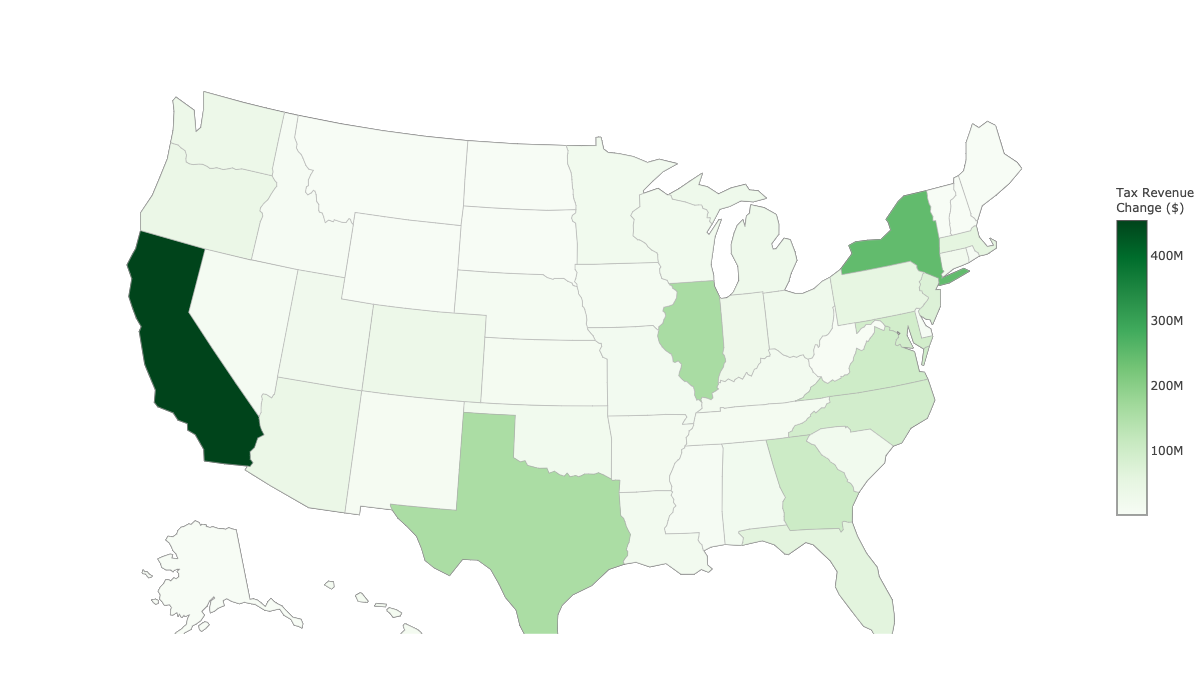

In [245]:
plotmap = [ dict(
        type = 'choropleth',
        locations = df.index,
        locationmode = 'USA-states',
        z = df['Tax Change'],
        text = df.index,
        colorscale = 'Greens',
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar =go.choropleth.ColorBar(
            title = 'Tax Revenue' + '<br>' + 'Change ($)',
            len=0.5
        ),
      ) ]

layout = dict(
    margin={"t": 0, "b": 0, "l": 0, "r": 0},
    geo = dict(
        showframe = False,
        showcoastlines = False,
        scope = 'usa',
        projection = dict(
            type = 'albers usa'
        )
    ),
     height=700,
    width=900
)

fig = dict( data=plotmap, layout=layout )
iplot(fig)

This is my change to detect version updates.